In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [11]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [12]:
def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

In [15]:
N, p = X.shape
print(N, p)

442 10


In [16]:
means, stds = [],[]
for j in range(p):
    col = X[:,j]
    means.append(np.mean(col))
    stds.append(np.std(col))
    for i in range(N):
        X[i,j] = (X[i,j]-means[j])/stds[j]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
N, p = X_train.shape
print(N, p)

353 10


In [21]:
# Space for design matrix
#
M = 200
U = np.zeros((N,M))
U_test = np.zeros((N,M))

In [22]:
# Basis function locations at random
#
C = np.random.randn(M,p)
kmeans = KMeans(init='k-means++', n_clusters=M)
kmeans.fit(X_train)
print(kmeans.score(X_train))
C = kmeans.cluster_centers_

-175.2610627324733


In [23]:
# Basis function range as distance between two random data
#
sigmas = []
for i in range(N):
    x1 = X_train[np.floor(np.random.rand()*N).astype(int),:]
    x2 = X_train[np.floor(np.random.rand()*N).astype(int),:]
    sigmas.append(np.linalg.norm(x1-x2))
sigma = np.linalg.norm(x1-x2)

In [24]:
# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)
        
for i in range(X_test.shape[0]):
    for j in range(M):
        U_test[i,j] = gaussian(X_test[i,:], C[j,:], sigma)

In [25]:
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y_train
l_test = np.linalg.inv(U_test.T @ U_test) @ U_test.T @ y_train

In [28]:
# Predicted values on training data
#
yh_train = U @ l
yh_test = U_test @ l
yh_test = yh_test[:len(y_test)]
#evaluate predictions
# MAE_test = mean_absolute_error(y_test, yh_test)
# print('Mean Absolute Error for Test Set for M=100 : %.3f' % (mean))

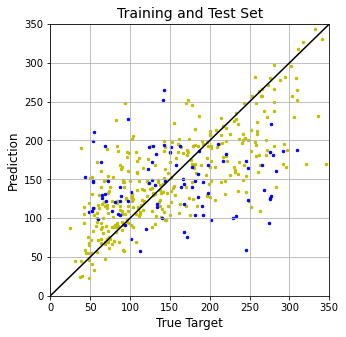

In [29]:
fig, ax = plt.subplots( figsize=(5,5))
lin = np.linspace(0,350)
# ax[0].plot(lin,lin,c='black')
# ax[0].set_ylim(0, 350)
# ax[0].set_xlim(0, 350)
# ax[0].scatter(y_train, yh_train, c='y', s=3)
# ax[0].grid(True)
# ax[0].set_title("Training Set", fontsize=14)
# ax[0].set_xlabel("True Target", fontsize=12)
# ax[0].set_ylabel("Prediction", fontsize=12)

# ax[1].plot(lin,lin,c='black')
# ax[1].set_ylim(0, 350)
# ax[1].set_xlim(0, 350)
# ax[1].scatter(y_test, yh_test , c ='b', s=3)
# ax[1].grid(True)
# ax[1].set_title("Test Set", fontsize=14)
# ax[1].set_xlabel("True Target", fontsize=12)
# ax[1].set_ylabel("Prediction", fontsize=12)


# ax[2].plot(lin,lin,c='black')
# ax[2].set_ylim(0, 350)
# ax[2].set_xlim(0, 350)
# ax[2].scatter(y_train, yh_train, c='y', s=6)
# ax[2].scatter(y_test, yh_test , c ='b', s=6)
# ax[2].grid(True)
# ax[2].set_title("Training and Test Set", fontsize=14)
# ax[2].set_xlabel("True Target", fontsize=12)
# ax[2].set_ylabel("Prediction", fontsize=12)

ax.plot(lin,lin,c='black')
ax.set_ylim(0, 350)
ax.set_xlim(0, 350)
ax.scatter(y_train, yh_train, c='y', s=6)
ax.scatter(y_test, yh_test , c ='b', s=6)
ax.grid(True)
ax.set_title("Training and Test Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

plt.savefig("TrainingTestingSet")

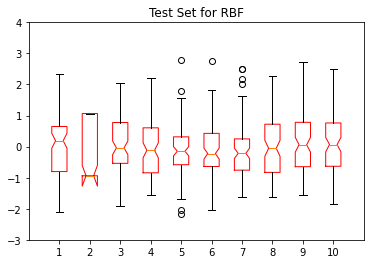

In [34]:
plt.boxplot(X_test, boxprops=dict(color='red'), notch=True)
ax = plt.gca()
ax.set_xlim([0, 11])
ax.set_ylim([-3, 4])
plt.title('Test Set for RBF');
plt.savefig('boxplotRBF')